In [1]:
from EMAN2 import *
import numpy as np
import os
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
from skimage import draw
import math
from skimage.filters import gaussian
from matplotlib.patches import Circle

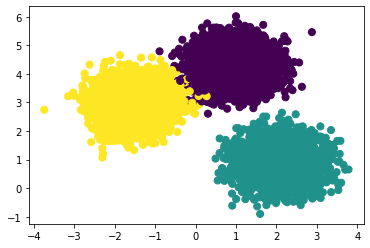

In [15]:
X, y = make_blobs(n_samples = 10000, n_features = 2, centers = 3, random_state = 0, cluster_std = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50)


In [2]:
ctf=EMAN2Ctf()
ctf.defocus=5.0
ctf.bfactor=50.0
ctf.voltage=300
ctf.apix=2
ctf.cs=0.001
ctf.ac=10

    #im1_f=im1.do_fft()
    #ctfmul=im1_f.copy()
    #ctf.compute_2d_complex(ctfmul,Ctf.CtfType.CTF_AMP)
    #im1_f.mult(ctfmul)
    #im2=im1_f.do_ift()
    #im2.mult(5.0)

In [203]:
def sim_blobs_ctf(imgsz=256, dataset_size=10,noise_sigma=0.05):
    c_l = [(imgsz//3,imgsz//4),(imgsz//3,imgsz-imgsz//3),(imgsz-imgsz//4,imgsz-imgsz//4)]
    print(c_l)
    label_l = []
    im_l = []
    for j in range(dataset_size):
        noise_ctf = make_ctf_noise(0,noise_sigma,imgsz)  
        outline = np.zeros((imgsz, imgsz))
        lab = np.zeros((imgsz, imgsz))
        for i in range(3):
            ran = random.uniform(0.3,0.8)
            ran_int = random.randint(5,11)
            rr_out, cc_out = draw.ellipse_perimeter(c_l[i][0],c_l[i][1], r_radius=int(ran*imgsz//4),c_radius=imgsz//40*ran_int, shape=noise_ctf.shape, orientation = 2*math.pi-2*ran*math.pi)
            rr_lab, cc_lab = draw.ellipse(c_l[i][0],c_l[i][1], r_radius=int(ran*imgsz//4),c_radius=imgsz//40*ran_int, shape=noise_ctf.shape, rotation = 2*ran*math.pi) 
            #noise_ctf[rr_out, cc_out] = 0.8
            lab[rr_lab, cc_lab]= 1
            outline[rr_out, cc_out]=1
        rand = random.uniform(0.8,2)
        noise_im = noise_ctf*lab*rand + gaussian(outline,1) + make_ctf_noise(noise_sigma=0.01,imgsz=160, bf = 50) 
        im_l.append(noise_im/noise_im.max())
        label_l.append(lab)
    return im_l, label_l 

In [173]:
def make_ctf_noise(noise_mean = 0,noise_sigma=0.5, imgsz=256, df = 4.0, bf = 200, vt=300, apix=2,cs = 0.001, ac = 10):
    noise = np.random.normal(noise_mean,noise_sigma,(imgsz,imgsz))
    noise_ctf = apply_ctf(noise, df,bf,vt,apix,cs,ac)
    #im2.mult(5.0)
    #plot_comparison(to_numpy(a),to_numpy(a2))
    return noise_ctf

In [141]:
def apply_ctf(im, df = 4.0, bf = 200, vt=300, apix=2,cs = 0.001, ac = 10):
    ctf=EMAN2Ctf()
    ctf.defocus=df
    ctf.bfactor=bf
    ctf.voltage=vt
    ctf.apix=apix
    ctf.cs=cs
    ctf.ac=ac    
    a = from_numpy(im)
    a_f = a.do_fft()
    ctfmul=a_f.copy()
    ctf.compute_2d_complex(ctfmul,Ctf.CtfType.CTF_AMP)
    a_f.mult(ctfmul)
    a2=a_f.do_ift()
    a2_np = to_numpy(a2)
    a2_np = a2_np/a2_np.max()
    #im2.mult(5.0)
    #plot_comparison(to_numpy(a),to_numpy(a2))
    return a2_np

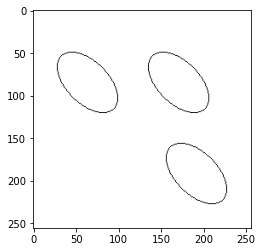

In [202]:
ctf=EMAN2Ctf()
ctf.defocus=0
ctf.bfactor=100
ctf.voltage=300
ctf.apix=2
ctf.cs=0.001
ctf.ac=5
imgsz=256
ran = random.uniform(0.3,0.8)
ran_int = random.randint(5,11)
c_l = [(imgsz//3,imgsz//4),(imgsz//3,imgsz-imgsz//3),(imgsz-imgsz//4,imgsz-imgsz//4)]
im = np.ones((imgsz, imgsz))
#im = np.random.normal(0,0.5,(imgsz,imgsz))
for i in range(3):  
    rr_out, cc_out = draw.ellipse_perimeter(c_l[i][0],c_l[i][1], r_radius=int(ran*imgsz//4)+1,c_radius=imgsz//40*ran_int+1, shape=im.shape, orientation = 2*math.pi-2*ran*math.pi)
    im[rr_out,cc_out]=0
    im = gaussian(im,0)
#ctf_im = apply_ctf(im)
plt.imshow(im, cmap='gray')
#img = from_numpy(im)
#img.write_image("test_outline.hdf")

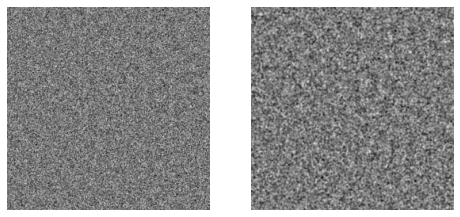

In [174]:
im1=make_ctf_noise(noise_sigma=0.01,imgsz=256, bf = 50)
im2=make_ctf_noise(noise_sigma=0.9,imgsz=256)
#plt.imshow(image,cmap='gray')
plot_comparison(im1,im2)

In [686]:
def sim_blobs(imgsz=360,dataset_size=10,noise_sigma=0.05):      
    c_l = [(imgsz//3,imgsz//4),(imgsz//3,imgsz-imgsz//3),(imgsz-imgsz//4,imgsz-imgsz//4)]
    print(c_l)
    label_l = []
    im_l = []
    
    for j in range(dataset_size):
        arr = np.zeros((imgsz, imgsz))   
        lab = np.zeros((imgsz, imgsz))
        for i in range(3):
            ran = random.uniform(0.3,0.8)
            ran_int = random.randint(5,11)
            noise = np.random.normal(0,noise_sigma,(imgsz,imgsz))
            rr_l, cc_l = draw.line(random.randint(0,imgsz-10), random.randint(0,imgsz-10), random.randint(0,imgsz-10), random.randint(0,imgsz-10))
            rr_out, cc_out = draw.ellipse_perimeter(c_l[i][0],c_l[i][1], r_radius=int(ran*imgsz//4)+1,c_radius=imgsz//40*ran_int+1, shape=arr.shape, orientation = 2*math.pi-2*ran*math.pi)
            rr, cc = draw.ellipse(c_l[i][0],c_l[i][1], r_radius=int(ran*imgsz//4),c_radius=imgsz//40*ran_int, shape=arr.shape, rotation = 2*ran*math.pi)  
            rr_lab, cc_lab = draw.ellipse(c_l[i][0],c_l[i][1], r_radius=int(ran*imgsz//4)+1,c_radius=imgsz//40*ran_int+1, shape=arr.shape, rotation = 2*ran*math.pi) 
            arr[rr_out, cc_out] = 1
            arr[rr, cc]  = ran_int*0.1
            #noisy_im = arr + noise
            #noisy_im[rr_l, cc_l] = 1
            lab[rr_lab, cc_lab]= 1
        label_l.append(lab)
        im_l.append(arr)  
    return im_l, label_l  
    #plt.imshow(arr,cmap='gray')
    #plt.show()

In [216]:
random_seed=812
im, lab = sim_blobs_ctf(imgsz=160,dataset_size=200,noise_sigma=0.6)

[(53, 40), (53, 107), (120, 120)]


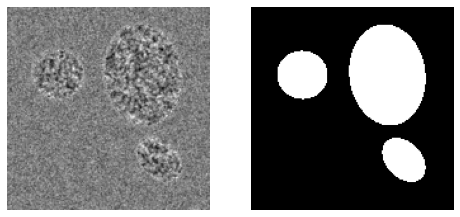

In [217]:
plot_comparison(im[7],lab[7])

In [374]:
def hann(q):
    return (0.5 + 0.5 * np.cos(q)) * (np.abs(q) < np.pi)
def make_monet_texture(height=64,width=64,ori=np.pi,sigma=0.0,ori_coherence=5,mean_intensity=0.5,std_intensity = 0.25,pad=10,seed=None):
    # ori from 0 to np.pi
    # sigma from 0 to 2
    # mean_intensity from 0.2 to 0.8
    # std_intensity stays 0.1
    import numpy as np
    from numpy import fft
    from scipy import signal
    from scipy.ndimage import gaussian_filter
    r = np.random.default_rng(seed)
    m = r.normal(size=[height+2*pad,width+2*pad])

    m = gaussian_filter(m,sigma)

    fy, fx = np.meshgrid(
        fft.ifftshift(np.arange(-np.floor(m.shape[0]/2), m.shape[0]/2))*2*np.pi/m.shape[0],
        fft.ifftshift(np.arange(-np.floor(m.shape[1]/2), m.shape[1]/2))*2*np.pi/m.shape[1],
        indexing='ij')

    finterp = np.exp(-(fy ** 2 + fx ** 2) / 2)
    m = fft.fft2(m, axes=(0, 1))

    theta = np.mod(np.arctan2(fx, fy) + ori, np.pi) - np.pi / 2
    fmask = finterp * (np.sqrt(ori_coherence) * hann(theta * ori_coherence))
    m = fmask * m
    m = np.real(fft.ifft2(m, axes=(0, 1)))
    
    m = np.clip(m,a_min=np.percentile(m.ravel(),1),a_max=np.percentile(m.ravel(),99))
    m = (m-m.mean())*(std_intensity/m.std()) + mean_intensity
    m = np.clip(m,a_min=0.0,a_max=1.0)
    return m[pad:height+pad,pad:width+pad]

In [715]:
r = np.random.default_rng(5)
new_imgs = []
imgsz=160
for i in im:
    ori = r.uniform(low=0,high=np.pi)
    text1 = make_monet_texture(height = imgsz,width=imgsz, ori=ori,sigma=r.uniform(low=0,high=0),
                               mean_intensity=r.uniform(low=0.2,high=0.3),std_intensity=0.1,
                              ori_coherence=r.uniform(low=2,high=3))
    text2 = make_monet_texture(height = imgsz,width=imgsz, ori=ori,sigma=r.uniform(low=0,high=0),
                               mean_intensity=r.uniform(low=0.2,high=0.3),std_intensity=0.1,
                              ori_coherence=r.uniform(low=2,high=3))
    #new_imgs.append(text1*i+np.clip((1-i),a_min=0,a_max=1) * text2)
    new_imgs.append(text1*i+(1-i) * text2)

    #new_imgs.append((text1-0.2)*i+np.clip((1-i),a_min=0,a_max=1) * text1)

# new_imgs = [make_monet_texture(height = 256,width=256, ori=r.uniform(low=0,high=np.pi),sigma=r.uniform(low=0,high=0),
#                                mean_intensity=r.uniform(low=0.3,high=0.4),ori_coherence=r.uniform(low=1,high=2)) * np.clip((i+0.1),a_min=0,a_max=1) \
#             + make_monet_texture(height = 256,width=256, ori=r.uniform(low=0,high=np.pi),sigma=r.uniform(low=3,high=5),
#                                mean_intensity=r.uniform(low=0.1,high=0.2),ori_coherence=r.uniform(low=4,high=8)) * 0.0
#             + make_monet_texture(height = 256,width=256, ori=r.uniform(low=0,high=np.pi),sigma=r.uniform(low=0,high=0),
#                                mean_intensity=r.uniform(low=0.6,high=0.8),ori_coherence=r.uniform(low=1,high=2)) * 0.0 \
#             for i in im[:10]]

In [716]:
monet_im=np.asarray(new_imgs)
monet_im.shape

(200, 160, 160)

In [ ]:
for i in range(10):
    plt.imshow(new_imgs[i],cmap='gray',vmin=0,vmax=1)
    plt.show()

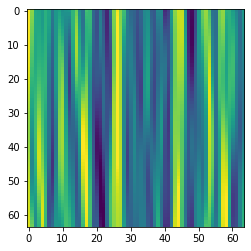

In [429]:
plt.imshow(make_monet_texture(ori_coherence=20,sigma=0))

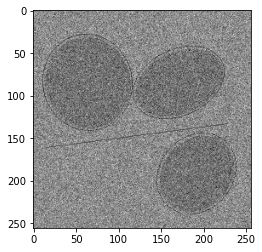

In [370]:
plt.imshow(im[10],cmap='gray')

In [219]:
stack_outfile(np.asarray(im),outfile="sim_ctf_test_160_wout_nolab.hdf",stackout=True)

Process 3D as a stack of 200 2D images
200 images, processing 0-199 stepping by 1
200 images


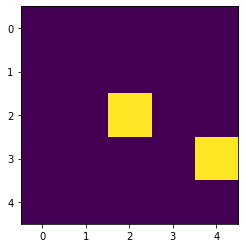

In [334]:
arr = np.zeros((5,5))
arr[1,1]=1
arr[2,2]=1
arr[3,4]=1
arr[1,1]
plt.imshow(arr)

In [220]:
def stack_outfile(*dats, outfile, stackout= False):
    im_x,im_y = dats[0].shape[1:]
    out_array = np.array([*zip(*dats)]).reshape(-1,im_x,im_y)
    #print(out_array.shape)
    out = from_numpy(out_array)   
    out.write_image(outfile)
    if stackout:
        #print("e2proc2d.py "+outfile+outfile[:-4]+"_stack.hdf --threed2twod")
        os.system("e2proc2d.py "+outfile+" "+outfile[:-4]+"_stack.hdf --threed2twod")
        print("Written file "+outfile[:-4]+"_stack.hdf to disk")
        os.remove(outfile)   

In [6]:
def plot_comparison(im1, im2, im1_name="",im2_name=""):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(im1, cmap=plt.cm.gray)
    ax1.set_title(im1_name)
    ax1.axis('off')
    ax2.imshow(im2, cmap=plt.cm.gray)
    ax2.set_title(im2_name)
    ax2.axis('off')

In [16]:
#proj_file = '3WJ_res30_apix494_center_projs.hdf'
outfile='trainstack.hdf'
print(os.getcwd())
im1 = EMData()
for f in os.listdir():
    if f.endswith('.hdf'):
        lst=(EMData.read_images(f))
        for i in range(len(lst)):
            im1.read_image(f,i)   
            im1.write_image(outfile,-1)   

/Users/landang/Downloads/Deep-Learning-segmentation/Yeast


In [5]:
#ctf_l=[]
for i in range(20653):
    im1=EMData(proj_file,i)
    im1_f=im1.do_fft()
    ctfmul=im1_f.copy()
    ctf.compute_2d_complex(ctfmul,Ctf.CtfType.CTF_AMP)
    im1_f.mult(ctfmul)
    im2=im1_f.do_ift()
    im2.mult(5.0)
    im2.write_image(outfile,-1)

In [16]:
im1_f=im1.do_fft()
ctfmul=im1_f.copy()
ctf.compute_2d_complex(ctfmul,Ctf.CtfType.CTF_AMP)
ctfsgn=im1_f.copy()
ctf.compute_2d_complex(ctfsgn,Ctf.CtfType.CTF_SIGN)
im1_f.mult(ctfmul)
im2=im1_f.do_ift()
im2.mult(5.0)
im1_f.mult(ctfsgn)
im3=im1_f.do_ift()
im3.mult(5.0)

In [22]:
for i in [im1,im2,im3]:
    i.write_image('hahaha.hdf',-1)

In [ ]:
l = EMData()


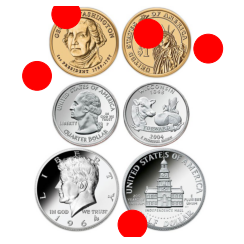

In [223]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

img = plt.imread('coin.jpeg')

x = np.random.rand(5) * img.shape[1]
y = np.random.rand(5) * img.shape[0]

fig, ax = plt.subplots(1)
ax.imshow(img)
ax.axis('off')

for xx, yy in zip(x, y):
    circ = Circle((xx, yy), 50, color='red')
    ax.add_patch(circ)

plt.show()

()